# Mini-projekt: Analiza Wydatków na Zdrowie
**Autor:** Jeremiasz Liżewski
**Temat:** Zdrowie (Health)
**Źródło danych:** GitHub (Seaborn Data Repository - healthexp.csv)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/healthexp.csv"

df = pd.read_csv(url)

df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [8]:
df.info()
print("\n--- Statystyki ---")
print(df.describe())

df = df.dropna()

df = df[df['Spending_USD'] > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB

--- Statystyki ---
              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


In [9]:
srednia_dlugosc = df['Life_Expectancy'].mean()
print(f"Średnia długość życia: {srednia_dlugosc:.2f} lat")

max_wydatki = df['Spending_USD'].max()
print(f"Najwyższe odnotowane wydatki: {max_wydatki} USD")

korelacja = df['Spending_USD'].corr(df['Life_Expectancy'])
print(f"Korelacja (Wydatki vs Długość życia): {korelacja:.2f}")

Średnia długość życia: 77.91 lat
Najwyższe odnotowane wydatki: 11859.179 USD
Korelacja (Wydatki vs Długość życia): 0.58


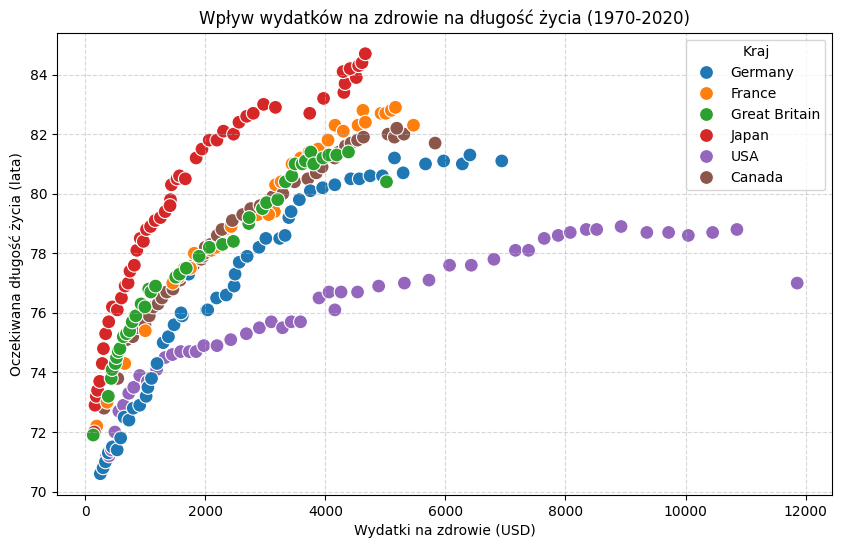

In [10]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Spending_USD', y='Life_Expectancy', hue='Country', s=100)

plt.title('Wpływ wydatków na zdrowie na długość życia (1970-2020)')
plt.xlabel('Wydatki na zdrowie (USD)')
plt.ylabel('Oczekiwana długość życia (lata)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Kraj')

plt.show()

### Raport i wnioski

Analiza zbioru danych dotyczącego zdrowia wykazuje silną korelację dodatnią między nakładami finansowymi a długością życia obywateli. Wykres punktowy obrazuje, że wraz ze wzrostem wydatków w dolarach, oczekiwana długość życia w badanych krajach systematycznie rośnie. Należy jednak zauważyć, że przy bardzo wysokich kwotach (powyżej 8000 USD) przyrost długości życia staje się mniej dynamiczny, co sugeruje prawo malejących przychodów. Stany Zjednoczone wyróżniają się najwyższymi wydatkami, które jednak nie przekładają się proporcjonalnie na najwyższą długość życia w porównaniu do innych krajów rozwiniętych. Przed analizą usunięto potencjalne braki w danych, aby zapewnić rzetelność obliczeń statystycznych. Ostatecznie dane potwierdzają, że inwestycje w system opieki zdrowotnej są kluczowe dla długowieczności społeczeństwa.